# Titanic Classification 

#### Importing the dependencies

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#### load the training and Testing datasets

In [296]:
# !type datasets\test.csv
# !type datasets\train.csv

In [264]:
train_df = pd.read_csv('datasets/train.csv', index_col= 0) # load data as a DataFrame with passengerId as index
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Explore the data

In [265]:
train_df.info() # getting a summmary of dataset

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [266]:
train_df.head() # show the first few rows 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [267]:
train_df.describe() # getting an statistical summary

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [268]:
train_df.isnull().sum() # check for missing values for every column

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### visualize the dataset

<Axes: ylabel='PassengerId'>

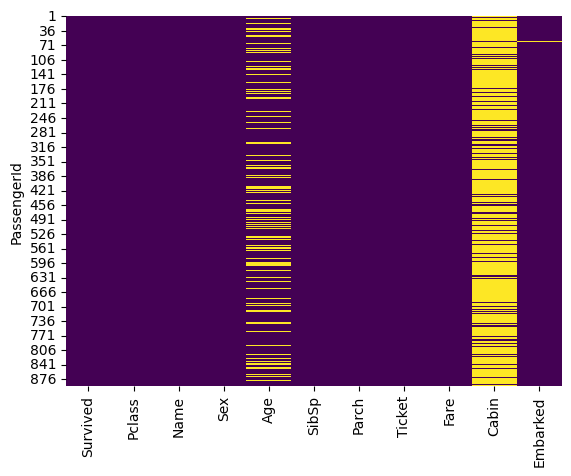

In [269]:
# to find out the missing values in the dataset
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='count'>

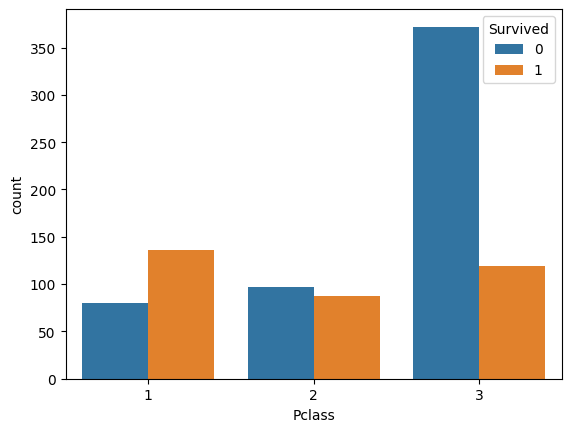

In [270]:
# to find out the number of survived and not survived passengers in each class
sns.countplot(x='Pclass', hue='Survived', data=train_df)
# as we can see the first class passengers were more likely to survive while thired class
# passengers had more casualties.

<Axes: xlabel='Sex', ylabel='count'>

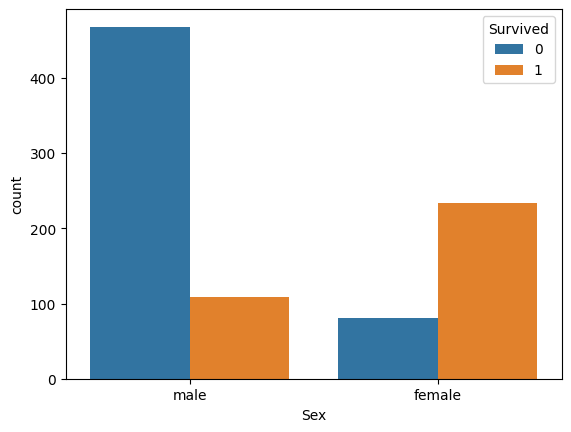

In [271]:
# to find out the number of survived and not survived based on gender
sns.countplot(x='Sex', hue='Survived', data=train_df)
# as we can see the number of survivals in females are larger than in males

#### Data processing and cleaning

In this stage we will do three main task:
1. handle missing values in embarked and age column
2. convert the categorial values
3. drop the unnecessary columns

In [272]:
# handling missing values in cabin age and embarked
# first we will fill the missing values in age with mean of the age column:
train_df['Age'] = train_df['Age'].fillna(round(train_df['Age'].mean(), 1))
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survival    0
dtype: int64

In [273]:
# fill the embarked column missing values with the mode value of it
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survival    0
dtype: int64

In [274]:
# dropping the unnecessary columns: cabin and ticket 
train_df.drop('Cabin', inplace = True, axis = 1)
train_df.drop('Ticket', inplace = True, axis = 1)

In [275]:
# Lets take a look at the missing values and columns once agian.
train_df.isnull().sum() # check for missing values for every column
# as we can see there is no missing values and no extra columns

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [276]:
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [277]:
# lets encode the categorial columns for easier operations
sex_mapping = { 'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)

In [278]:
Embarked_mapping = {'S' : 0, 'C' : 1, 'Q': 2}
train_df['Embarked'] = train_df['Embarked'].map(Embarked_mapping)

In [279]:
# lets check the categorial data:
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())

[0 1]
[0 1 2]


### Preparing the testing dataset:

In [280]:
test_df = pd.read_csv('datasets/test.csv', index_col= 0, )
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [281]:
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [282]:
# train_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [283]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [284]:
test_df.drop('Cabin', inplace = True, axis = 1)
test_df.drop('Ticket', inplace = True, axis = 1)
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [285]:
# categorial data:
# lets encode the categorial columns for easier operations
sex_mapping = { 'male': 0, 'female': 1}
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

In [286]:
Embarked_mapping = {'S' : 0, 'C' : 1, 'Q': 2}
test_df['Embarked'] = test_df['Embarked'].map(Embarked_mapping)

In [287]:
# lets check the categorial data:
print(test_df['Sex'].unique())
print(test_df['Embarked'].unique())

[0 1]
[2 0 1]


In [288]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2
895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0


In [289]:
# choose the features
train_x= train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,0
4,1,1,35.0,1,0,53.1000,0
5,3,0,35.0,0,0,8.0500,0


In [290]:
train_y= train_df['Survived']
train_y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [291]:
test_x = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
test_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,2
893,3,1,47.0,1,0,7.0000,0
894,2,0,62.0,0,0,9.6875,2
895,3,0,27.0,0,0,8.6625,0
896,3,1,22.0,1,1,12.2875,0


In [292]:
model = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logreg', LogisticRegression(max_iter=1000))  # Logistic Regression model
])

In [293]:
# Train the model
model.fit(train_x, train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [294]:
# Make predictions on the test set
result_y = model.predict(test_x)
print(len(result_y))
test_df.shape[0]

418


418

In [295]:
# the result for the testing data set:
test_df['Survival'] = result_y
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survival
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.50000,0,0,7.8292,2,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000,0,0
894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875,2,0
895,3,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500,0,0
1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000,1,1
1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500,0,0


In [298]:
# Calculate accuracy
test_y = pd.read_csv('datasets/gender_submission.csv', index_col= 0) 
accuracy = accuracy_score(test_y, result_y)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95
